In [1265]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as arbre
from sklearn.model_selection import cross_validate

In [1266]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)


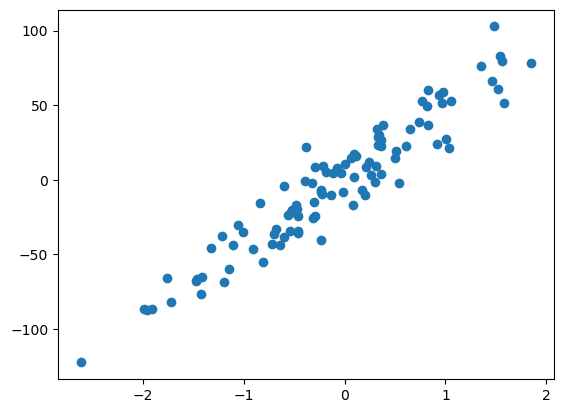

In [1267]:
plt.scatter(X, y);

In [1268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [1269]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

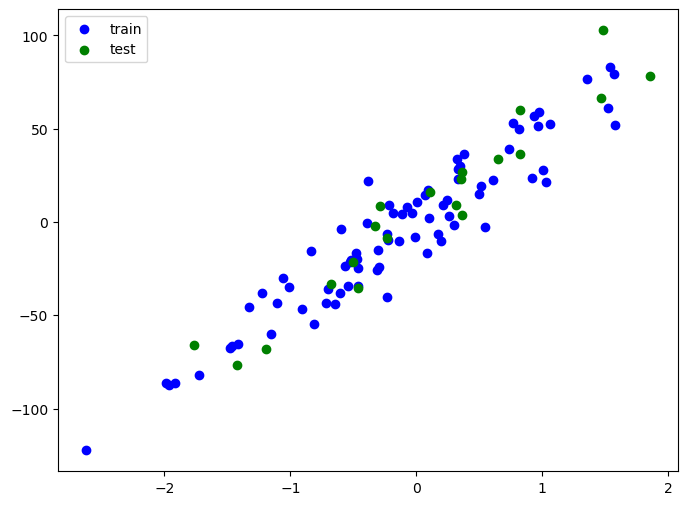

In [1270]:
ax, fig = plt.subplots(figsize=(8, 6))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.legend();

In [1271]:
model = LinearRegression()

In [1272]:
model.fit(X_train, y_train)

LinearRegression()

In [1273]:
y_pred = model.predict(X_test)

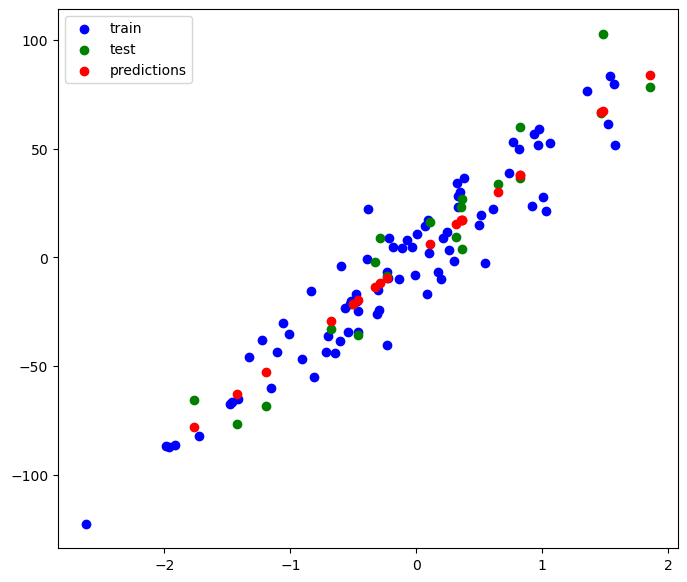

In [1274]:
ax, fig = plt.subplots(figsize=(8, 7))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions")
fig.legend();

In [1275]:
score = mean_squared_error(y_test, y_pred, squared=False)
score

13.512026235463795

In [1276]:
from  sklearn.preprocessing import PolynomialFeatures

In [1277]:
import numpy as np

In [1278]:
X, y = make_regression(n_samples=500, n_features=1, random_state=42, noise=15)

In [1279]:
y = y**2 + y

In [1280]:
model = LinearRegression()

In [1281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [1282]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [1283]:
model.fit(X_train, y_train)

LinearRegression()

In [1284]:
y_pred = model.predict(X_test)

In [1285]:
score = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
score

8888.201124210922

In [1286]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [1287]:
y_pred_poly = model.predict(X_test_poly)

In [1288]:
score_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test, squared=False)
score_poly

1751.2711502360635

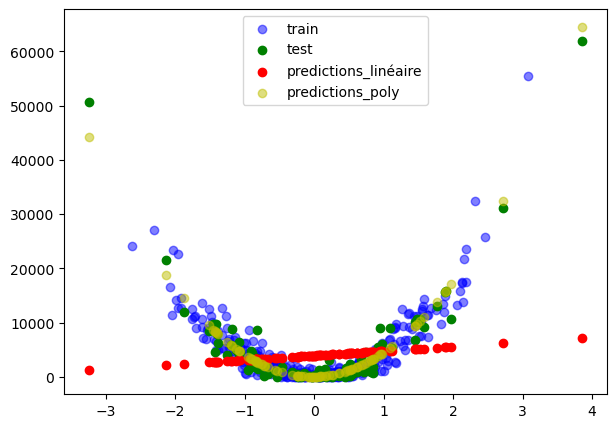

In [1289]:
ax, fig = plt.subplots(figsize=(7, 5))
fig.scatter(X_train, y_train, c="b", alpha=0.5, label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions_linéaire")
fig.scatter(X_test, y_pred_poly, c="y", alpha=0.5, label="predictions_poly")
fig.legend();

In [1290]:
X2, y2 = make_regression(n_features=1, n_samples=500, random_state=42, noise=20)
y2 = y2**3

In [1291]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.8)

In [1292]:
X_train_poly = PolynomialFeatures(3).fit_transform(X_train)
X_test_poly = PolynomialFeatures(3).fit_transform(X_test)

In [1293]:
model.fit(X_train, y_train)

LinearRegression()

In [1294]:
y_pred = model.predict(X_test)

In [1295]:
score = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
score

611445.4823951307

In [1296]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [1297]:
y_pred_poly = model.predict(X_test_poly)

In [1298]:
score_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test, squared=False)
score_poly

393890.70389307145

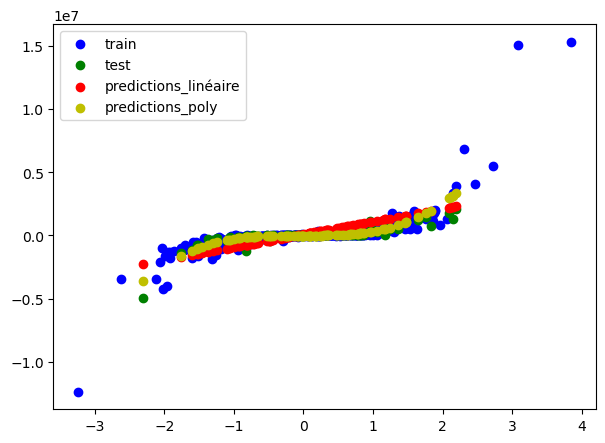

In [1299]:
ax, fig = plt.subplots(figsize=(7, 5))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions_linéaire")
fig.scatter(X_test, y_pred_poly, c="y", label="predictions_poly")
fig.legend();

In [1300]:
data_covid = pd.read_csv("reduced_covid_sexe.csv")
data_covid["jour"] = data_covid["Unnamed: 0"][2:] 
data_covid.drop(1, inplace=True)
data_covid.rename(index={0:"sexe"}, inplace=True)
data_covid.drop(data_covid.columns[0], axis=1, inplace=True)
data_covid.drop("sexe" ,inplace=True)
data_covid.index -= 2
data_covid

,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2,jour
0,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0,2020-03-18
1,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0,2020-03-19
2,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0,2020-03-20
3,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0,2020-03-21
4,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,13113.0,5950.0,6923.0,728.0,457.0,263.0,861972.0,421189.0,432745.0,135936.0,77555.0,57324.0,2023-03-27
1105,13178.0,6000.0,6943.0,720.0,452.0,261.0,862458.0,421407.0,433007.0,135975.0,77575.0,57342.0,2023-03-28
1106,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0,2023-03-29
1107,13186.0,5953.0,7003.0,732.0,459.0,267.0,863331.0,421833.0,433447.0,136045.0,77609.0,57376.0,2023-03-30


In [1301]:
data_covid.to_csv("covid_cleaned.csv")

In [1302]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1108
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hosp    1109 non-null   float64
 1   hosp.1  1109 non-null   float64
 2   hosp.2  1109 non-null   float64
 3   rea     1109 non-null   float64
 4   rea.1   1109 non-null   float64
 5   rea.2   1109 non-null   float64
 6   rad     1109 non-null   float64
 7   rad.1   1109 non-null   float64
 8   rad.2   1109 non-null   float64
 9   dc      1109 non-null   float64
 10  dc.1    1109 non-null   float64
 11  dc.2    1109 non-null   float64
 12  jour    1109 non-null   object 
dtypes: float64(12), object(1)
memory usage: 121.3+ KB


In [1303]:
model = LinearRegression()

In [1304]:
X = np.expand_dims(data_covid.index, axis=1)
y = data_covid["dc"]

In [1305]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8)

In [1306]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((887, 1), (222, 1), (887,), (222,))

In [1307]:
model.fit(X_train, y_train)

LinearRegression()

In [1308]:
y_pred = model.predict(X_test)

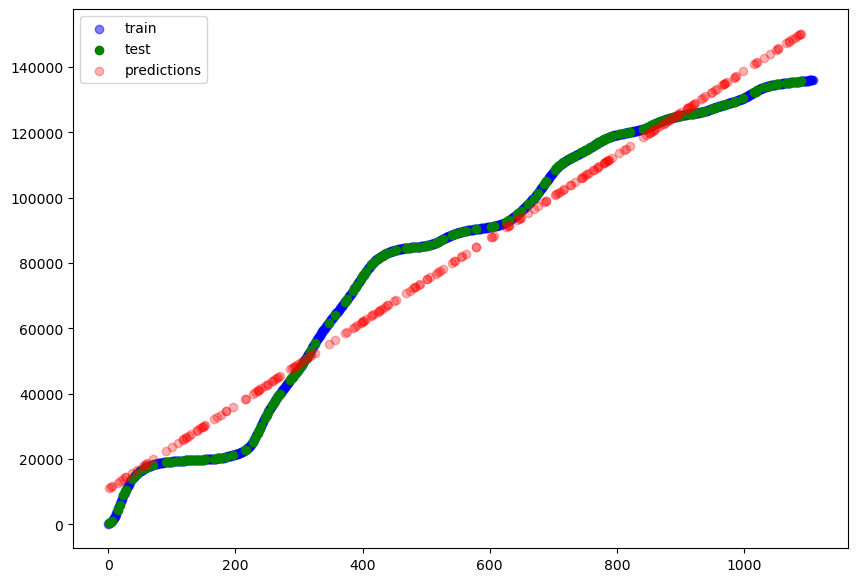

In [1309]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train, y_train, c="b", alpha=0.5, label="train")
fig.scatter(X_test, y_test, c="g", label="test")
fig.scatter(X_test, y_pred, c="r", alpha=0.3, label="predictions")
fig.legend();

In [1310]:
score = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
score

8662.740654359965

In [1311]:
split = int(0.2 * len(X))

In [1312]:
def sample_data(X_start, X_stop, y=data_covid["dc"]):
    X_n = np.expand_dims(np.arange(X_start, X_stop), axis=1)
    y_n = y[X_start:X_stop]
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, shuffle=False) 
    model.fit(X_train_n, y_train_n)
    y_pred_n = model.predict(X_test_n)
    return mean_squared_error(y_true=y_test_n, y_pred=y_pred_n), y_pred_n, X_test_n, y_test_n, X_train_n, y_train_n, model

In [1313]:
score_1, y_pred_1, X_test_1, y_test_1, X_train_1, y_train_1, model_1 = sample_data(0, split)
score_2, y_pred_2, X_test_2, y_test_2, X_train_2, y_train_2, model_2 = sample_data(split,2* split)
score_3, y_pred_3, X_test_3, y_test_3, X_train_3, y_train_3, model_3 = sample_data(2*split, 3*split)
score_4, y_pred_4, X_test_4, y_test_4, X_train_4, y_train_4, model_4 = sample_data(3*split, len(X))

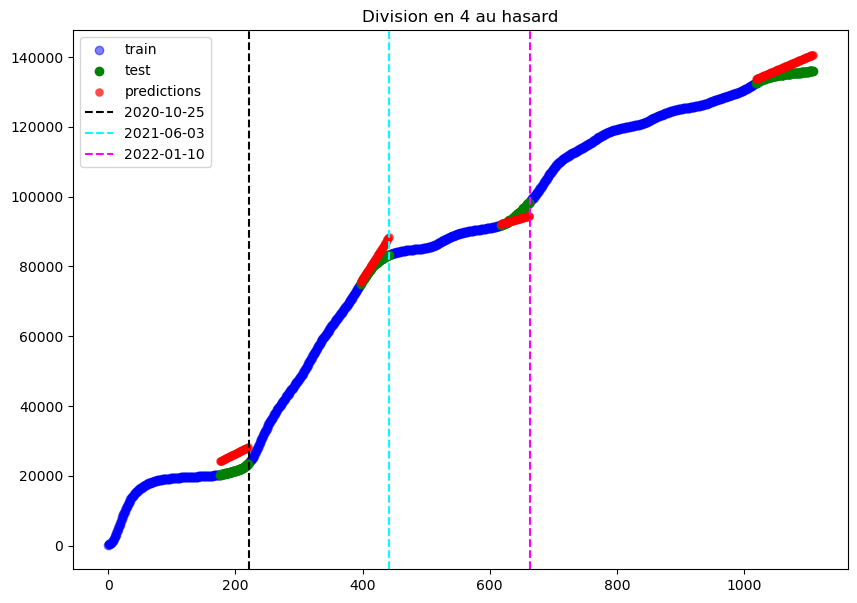

In [1314]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train_1, y_train_1, c="b", alpha=0.5, label="train")
fig.scatter(X_train_2, y_train_2, c="b", alpha=0.5)
fig.scatter(X_train_3, y_train_3, c="b", alpha=0.5)
fig.scatter(X_train_4, y_train_4, c="b", alpha=0.5)
fig.scatter(X_test_1, y_test_1, c="g", label="test")
fig.scatter(X_test_2, y_test_2, c="g")
fig.scatter(X_test_3, y_test_3, c="g")
fig.scatter(X_test_4, y_test_4, c="g")
fig.scatter(X_test_1, y_pred_1, c="r", alpha=0.7, linewidths=0.1, label="predictions")
fig.scatter(X_test_2, y_pred_2, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_3, y_pred_3, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_4, y_pred_4, c="r", alpha=0.7,  linewidths=0.1)
fig.axvline(split, linestyle = "--", c="black", label = data_covid["jour"][split])
fig.axvline(2*split, linestyle = "--", c="cyan", label = data_covid["jour"][2*split] )
fig.axvline(3*split, linestyle = "--", c="magenta", label = data_covid["jour"][3*split])
fig.set_title("Division en 4 au hasard")
fig.legend();

In [1315]:
score = {}
score["score_1"] = score_1
score["score_2"] = score_2
score["score_3"] = score_3
score["score_4"] = score_4
score

{'score_1': 22125119.7005722,
 'score_2': 5663335.823971832,
 'score_3': 3340762.318840674,
 'score_4': 6991003.552741703}

In [1316]:
Tree = DecisionTreeRegressor(max_leaf_nodes=4)

In [1317]:
Tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=4)

[Text(0.5, 0.8333333333333334, 'x[0] <= 376.5\nsquared_error = 1758827153.411\nsamples = 1109\nvalue = 81837.816'),
 Text(0.25, 0.5, 'x[0] <= 255.5\nsquared_error = 310665153.209\nsamples = 377\nvalue = 29744.472'),
 Text(0.125, 0.16666666666666666, 'squared_error = 45527353.726\nsamples = 256\nvalue = 18893.906'),
 Text(0.375, 0.16666666666666666, 'squared_error = 95522018.089\nsamples = 121\nvalue = 52701.041'),
 Text(0.75, 0.5, 'x[0] <= 693.5\nsquared_error = 387210194.141\nsamples = 732\nvalue = 108667.311'),
 Text(0.625, 0.16666666666666666, 'squared_error = 57144165.653\nsamples = 317\nvalue = 87973.719'),
 Text(0.875, 0.16666666666666666, 'squared_error = 62372628.675\nsamples = 415\nvalue = 124474.224')]

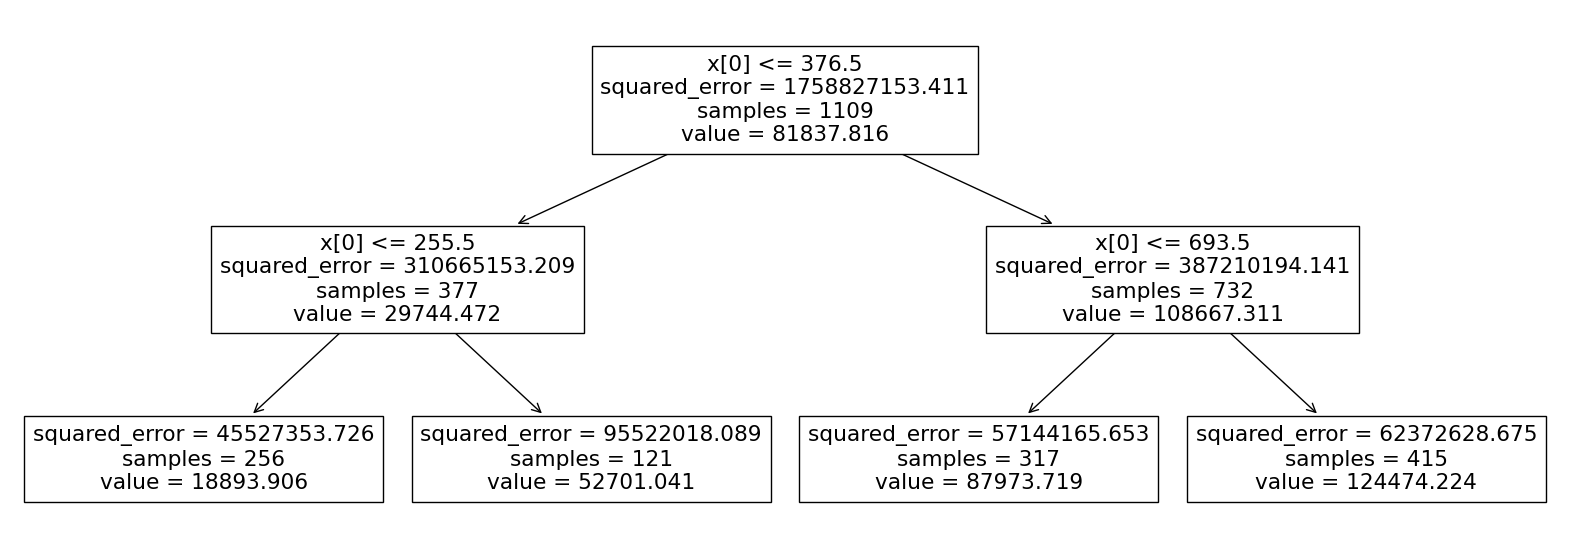

In [1318]:
ax, fig = plt.subplots(figsize=(20, 7))
arbre.plot_tree(Tree)

In [1319]:
thresold_values = Tree.tree_.threshold
thresold_values

array([376.5, 255.5, 693.5,  -2. ,  -2. ,  -2. ,  -2. ])

In [1320]:
score_1, y_pred_1, X_test_1, y_test_1, X_train_1, y_train_1, model_1_ = sample_data(0, 256)
score_2, y_pred_2, X_test_2, y_test_2, X_train_2, y_train_2, model_2_ = sample_data(256,377)
score_3, y_pred_3, X_test_3, y_test_3, X_train_3, y_train_3, model_3_ = sample_data(377, 694)
score_4, y_pred_4, X_test_4, y_test_4, X_train_4, y_train_4, model_4_ = sample_data(694, 1109)

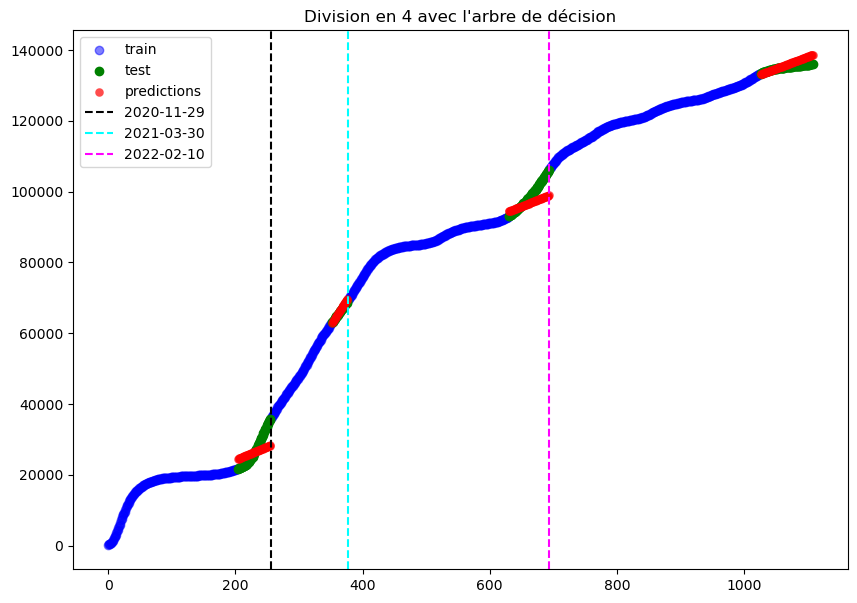

In [1321]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train_1, y_train_1, c="b", alpha=0.5, label="train")
fig.scatter(X_train_2, y_train_2, c="b", alpha=0.5)
fig.scatter(X_train_3, y_train_3, c="b", alpha=0.5)
fig.scatter(X_train_4, y_train_4, c="b", alpha=0.5)
fig.scatter(X_test_1, y_test_1, c="g", label="test")
fig.scatter(X_test_2, y_test_2, c="g")
fig.scatter(X_test_3, y_test_3, c="g")
fig.scatter(X_test_4, y_test_4, c="g")
fig.scatter(X_test_1, y_pred_1, c="r", alpha=0.7, linewidths=0.1, label="predictions")
fig.scatter(X_test_2, y_pred_2, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_3, y_pred_3, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_4, y_pred_4, c="r", alpha=0.7,  linewidths=0.1)
fig.axvline(256, linestyle = "--", c="black", label = data_covid["jour"][256])
fig.axvline(377, linestyle = "--", c="cyan", label = data_covid["jour"][377] )
fig.axvline(694, linestyle = "--", c="magenta", label = data_covid["jour"][694])
fig.set_title("Division en 4 avec l'arbre de décision")
fig.legend();

In [1322]:
score = {}
score["score_1"] = score_1
score["score_2"] = score_2
score["score_3"] = score_3
score["score_4"] = score_4
score

{'score_1': 12162913.667699488,
 'score_2': 207940.08045985008,
 'score_3': 10638658.75294317,
 'score_4': 1608916.5123606012}

In [1323]:
X = np.expand_dims(np.arange(len(X)), axis=1)
y = data_covid["dc"]
cv_results_1 = cross_validate(model_1, X, y, cv=5)
cv_results_1_ = cross_validate(model_1_, X, y, cv=5)
cv_results_1

{'fit_time': array([0.00199032, 0.        , 0.        , 0.00309753, 0.00099969]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([-10.57981158,   0.65437936,  -5.70696384,  -0.32291694,
        -27.23635672])}

In [1325]:
cv_results_1_

{'fit_time': array([0.00099683, 0.        , 0.        , 0.00045109, 0.00123072]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([-10.57981158,   0.65437936,  -5.70696384,  -0.32291694,
        -27.23635672])}